<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/heterogeneousGraphVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P V S N S GANESH KUMAR**

**22MCB0036**

**DATASET:** [Dataset](https://github.com/Jhy1993/Datasets-for-Heterogeneous-Graph/tree/master/Douban%20Book)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data from each file
state_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_state.csv',header=None)
state_data = state_data.head(34)
degree_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_ugDegree.csv',header=None)
stay_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_stay.csv',header=None)

In [3]:
state_data

,0,1
0,22MCB0001,Tamil Nadu
1,22MCB0002,Gujarat
2,22MCB0003,Karnataka
3,22MCB0004,Maharastra
4,22MCB0005,Andhra Pradesh
5,22MCB0006,Tamil Nadu
6,22MCB0007,Delhi
7,22MCB0008,Madhya Pradesh
8,22MCB0009,Tamil Nadu
9,22MCB0010,Tamil Nadu


In [4]:
# Create an empty graph
G = nx.Graph()

In [5]:
# Add nodes and edges to the graph
students = set(state_data.iloc[:, 0])
states = set(state_data.iloc[:, 1])
degrees = set(degree_data.iloc[:, 1])
stays = set(stay_data.iloc[:, 1])

In [6]:
students = list(students)
states = list(states)
degrees = list(degrees)
stays = list(stays)

In [7]:
# Add nodes to the graph
for student in students:
   G.add_node(student, node_type='student')
for state in states:
    G.add_node(state, node_type='state')
for degree in degrees:
    G.add_node(degree, node_type='degree')
for stay in stays:
    G.add_node(stay, node_type='stay')

In [8]:
# Add edges to the graph
for _, row in state_data.iterrows():
    student = row[0]
    state = row[1]
    G.add_edge(student, state)

for _, row in degree_data.iterrows():
    student = row[0]
    degree = row[1]
    G.add_edge(student, degree)

for _, row in stay_data.iterrows():
    student = row[0]
    stay = row[1]
    G.add_edge(student, stay)


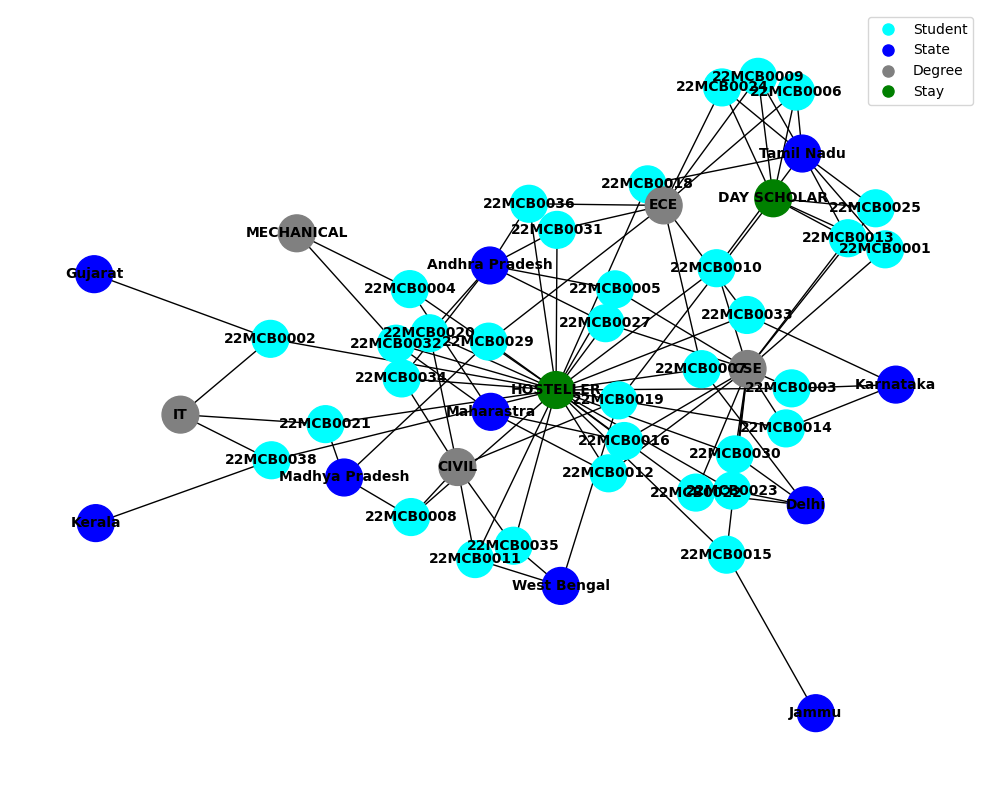

In [16]:
# Draw the graph
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
pos = nx.spring_layout(G, scale=5)  # Specify the layout algorithm and increase the scale
node_colors = {'student': 'aqua', 'state': 'blue', 'degree': 'grey', 'stay': 'green'}
node_types = nx.get_node_attributes(G, 'node_type')
node_color = [node_colors[node_types[node]] for node in G.nodes]
edge_color = 'black'  # Specify the edge color
edge_width = 1  # Specify the edge width

nx.draw_networkx(
    G, pos=pos, node_color=node_color, with_labels=True,
    node_size=700, font_size=10, font_weight='bold',
    edge_color=edge_color, width=edge_width
)

# Create a legend for the node colors
legend_labels = ['Student', 'State', 'Degree', 'Stay']
legend_colors = ['aqua', 'blue', 'grey', 'green']
legend_handles = [plt.Line2D([], [], marker='o', markersize=8, color=color, linestyle='None')
                  for color in legend_colors]
plt.legend(legend_handles, legend_labels)

# Display the graph
plt.axis('off')  # Remove the axis
plt.tight_layout()  # Adjust the layout
plt.show()
